#  🌿 Ensemble Methods and Tree-Based Models 🌲
What follows is a series of exercises by an economics PhD student on a quest to sharpen her econ coding skills - this time: Decision Trees and Random Forests, and beyond - with a lot of help from ChatGPT.

This notebook contains the following:
1. 🌴 [Decision Trees](#dt)  
   1.1. [Decision Trees for Classification](#dt-classification)  
   1.2. [Decision Trees for Regression](#dt-regression)  
   1.3. [Honest Trees](#honest-trees)  
2. 🌲 [Random Forests](#rf)  


I have in mind to add the following in future:

* 🚀 XGBoost  
* 🔍 More advanced tree-based methods  

Feel free to reach me at zkhnl@uw.edu and check out more totally amateur tutorials at [my GitHub](https://github.com/zahrakhanalizade/econ_coding)




<a name="dt"></a>
# 1. 🌴 Decision Trees

<a name="dt-classification"></a>
## 1.1. Decision Trees for Classification

Decision trees are intuitive models that split data into branches based on feature values to predict outcomes. They are useful for both classification and regression tasks. The tree structure makes them easy to visualize and interpret, but without proper constraints, they can overfit the data.

### 📊 Dataset: The Iris Dataset
In this example, we'll use the well-known **Iris dataset**, which contains 150 observations of iris flowers with the following features:

- **`sepal length`**, **`sepal width`**, **`petal length`**, and **`petal width`** (all measured in centimeters).
- **`target`** labels indicating the species:  
  - `0`: Setosa  
  - `1`: Versicolor  
  - `2`: Virginica  

We'll train a decision tree classifier using this dataset to predict the species based on flower measurements.

**Petals** are the colorful, outer parts of a flower that attract pollinators.  
**Sepals** are the green, leaf-like structures beneath the petals that protect the bud before it blooms.  
*See [this image](https://drive.google.com/file/d/14-7fFE_C5lcESWEQ70we-j0pz2hanXut/view?usp=drive_link) if you're like me and didn't know what they are.* 😊




In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=42)

### 🔑 Key Arguments in Decision Trees
- **`criterion`**: Defines the function to measure the quality of a split. Common options:  
  - `"gini"` (default) → Gini Impurity  
  - `"entropy"` → Information Gain  
- **`max_depth`**: Limits the depth of the tree to prevent overfitting.  
- **`min_samples_split`**: Minimum number of samples required to split an internal node.  
- **`min_samples_leaf`**: Minimum number of samples required to be at a leaf node.  
- **`random_state`**: Ensures reproducibility.  

### 🔎 Which Criterion Should You Use?
- **Gini** → Faster and effective when class imbalance is **not critical**.  
- **Entropy** → Better for handling **class imbalance** and maximizing information gain.

### ⚖️ Key Difference
Gini tends to produce **larger splits** that favor the most common class, while Entropy tends to create **more balanced splits** by prioritizing reductions in uncertainty.


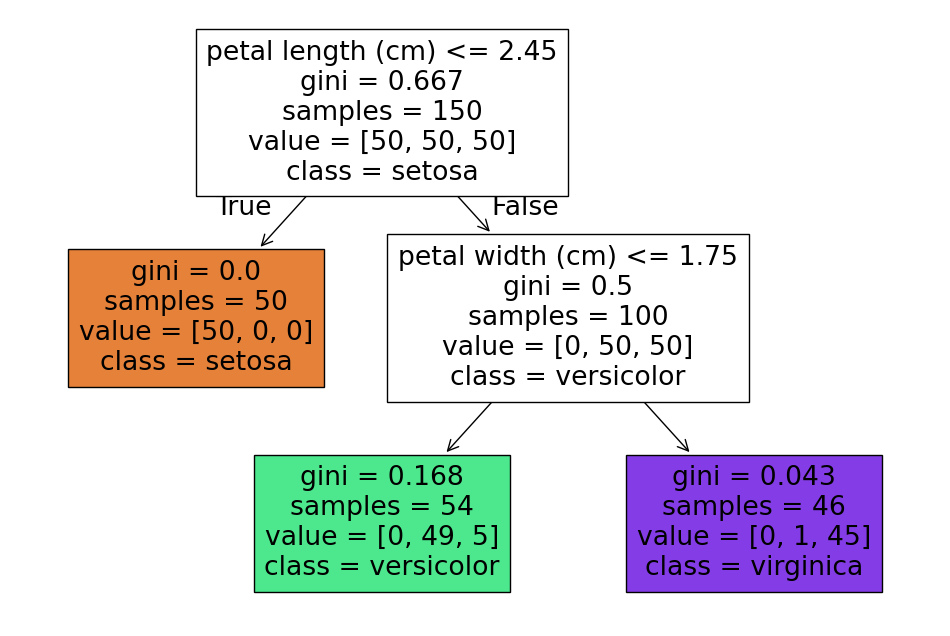

In [ ]:
# Fit the model to the data
clf.fit(X, y)

# Visualize the tree
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


the probability of each class can be predicted, which is the fraction of training samples of the class in a leaf:

In [ ]:
clf.predict_proba(X[:5])


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

<a name="dt-regression"></a>

# 1.2 Decision Tree for Regression

### 🔎 Trying Other Criteria Besides Gini for Evaluating the Quality of Tree Splits in a Single Decision Tree: **MSE** and **MAE** for **Regression**  

In regression tasks, decision trees evaluate splits differently from classification models. Instead of using **Gini Impurity** or **Entropy**, regression trees commonly rely on criteria that minimize prediction error.

### 📈 Criteria for Regression Trees
- **`criterion='squared_error'` (MSE)**:  
   - Uses **Mean Squared Error** (MSE), which minimizes the average squared difference between predicted and actual values.  
   - MSE is sensitive to outliers since squared differences amplify large errors.  
   - Tends to produce smoother, more stable predictions in regions without extreme values.  

- **`criterion='absolute_error'` (MAE)**:  
   - Uses **Mean Absolute Error** (MAE), which minimizes the average absolute difference between predicted and actual values.  
   - MAE is **more robust to outliers**, but splits may be less stable compared to MSE.  

### ⚠️ Key Difference
- **MSE** prioritizes reducing large errors and often creates **balanced splits** based on variance.  
- **MAE** may create more **asymmetric splits** to minimize absolute error, which can be advantageous when protecting against outliers.  

In the next example, we'll visualize both approaches side by side to highlight these differences.


<a name="honest-trees"></a>

# Honest Trees
See this [much better article](https://towardsdatascience.com/understanding-causal-trees-920177462149) by [Matteo Courthoud](https://towardsdatascience.com/author/matteo-courthoud/) to learn more about causal trees. Actually, do yourself a favor and read his [articles](https://towardsdatascience.com/author/matteo-courthoud/) and thank me later.


## 🌳 Honest Trees  
Honest trees provide a solution to the bias introduced when the same data is used to both construct and evaluate a decision tree. This bias arises because the tree's partitions are **endogenous**, meaning they are based on the same data that will later be evaluated. This is a form of **overfitting**.

### 🔍 How Do Honest Trees Work?
To reduce this bias, honest trees follow a simple yet effective strategy:  

1. **Split the data into two independent subsamples:**  
   - One sample is used to **construct the tree's structure** (splits and partitions).  
   - The other sample is used to **evaluate outcomes** or **estimate treatment effects** within those partitions.  

This separation ensures that the sample used for evaluation is **independent** of the tree's structure, allowing us to apply the **Central Limit Theorem** for inference confidently.

### ⚠️ Drawback and Solution
- **Drawback:** Splitting the data reduces the effective sample size, potentially lowering the power to detect meaningful effects.  
- **Solution:** To recover some of this lost power:
   - Repeat the procedure by swapping the roles of the two subsamples.  
   - Average the two resulting estimates for each individual.  
   - Adjust the standard errors accordingly to account for this averaging.

Honest trees strike a balance between reducing bias and maintaining statistical power, making them particularly useful in **causal inference** and **heterogeneous treatment effect estimation**.

### 📌 Disclaimer  
For a deeper dive into **Honest Trees** and their role in **causal inference**, I have more stuff in my other notebook: [**Causal_ML**](https://github.com/zahrakhanalizade/econ_coding/blob/main/Causal_ML.ipynb)



In [ ]:
from econml.dml import CausalForestDML
tree_model = CausalForestDML(n_estimators=1, subforest_size=1, inference=False, max_depth=4)
tree_model = tree_model.fit(Y=df[dgp.Y], X=df[X], T=df[dgp.D])

from econml.cate_interpreter import SingleTreeCateInterpreter

intrp = SingleTreeCateInterpreter(max_depth=2).interpret(tree_model, df[X])
intrp.plot(feature_names=X, fontsize=12)


<a name="rf"></a>
## 2. Random Forests

Random forests are ensemble models that combine multiple decision trees to improve predictive performance. Each tree is trained on a random subset of the data and features, and their predictions are *averaged* **(for regression)** or *voted* on **(for classification)**. This approach reduces overfitting and improves model robustness, making random forests highly effective for complex datasets.

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy * 100:.2f}%')


Random Forest Accuracy: 100.00%


Note: Accuracy 100% is guaranteed with Iris dataset because it's a very structured dataset with only 4 features and 3 classes and straightforward classification rules.

### Trying other criteria besides gini for evaluating the quality of tree splits in the single decision tree: gini and entropy for **classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Using Gini impurity (default)
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf_gini.fit(X_train, y_train)

# Using Entropy (Information Gain)
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf_entropy.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

### Visualize:

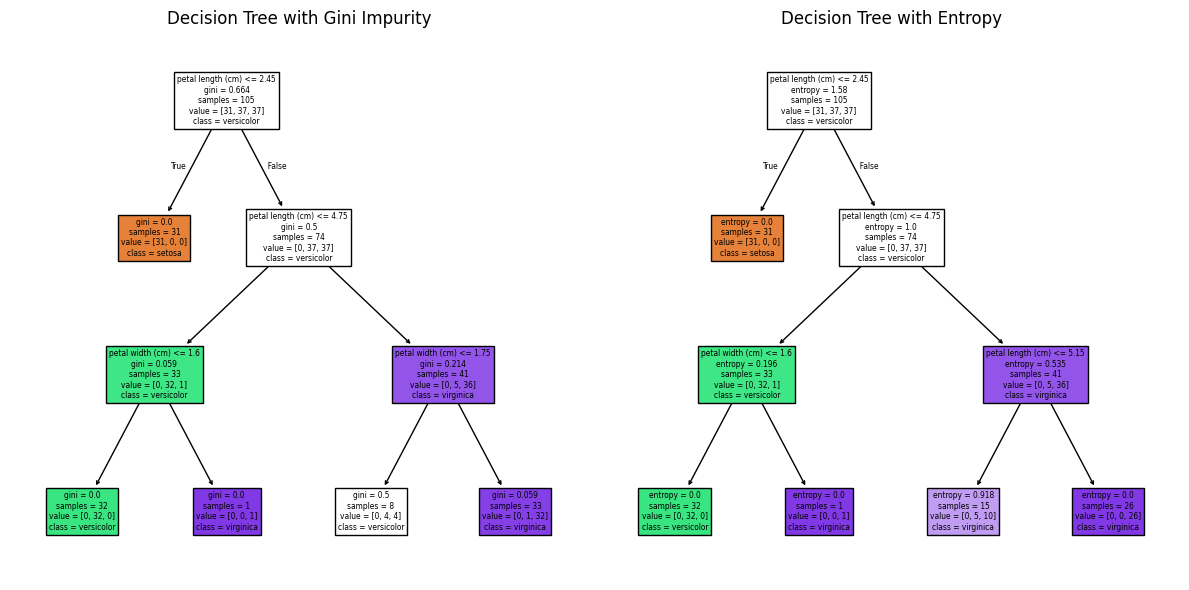

In [ ]:

import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(12, 6))

# Gini Tree
plt.subplot(1, 2, 1)
tree.plot_tree(clf_gini, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree with Gini Impurity")

# Entropy Tree
plt.subplot(1, 2, 2)
tree.plot_tree(clf_entropy, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree with Entropy")

plt.tight_layout()
plt.show()


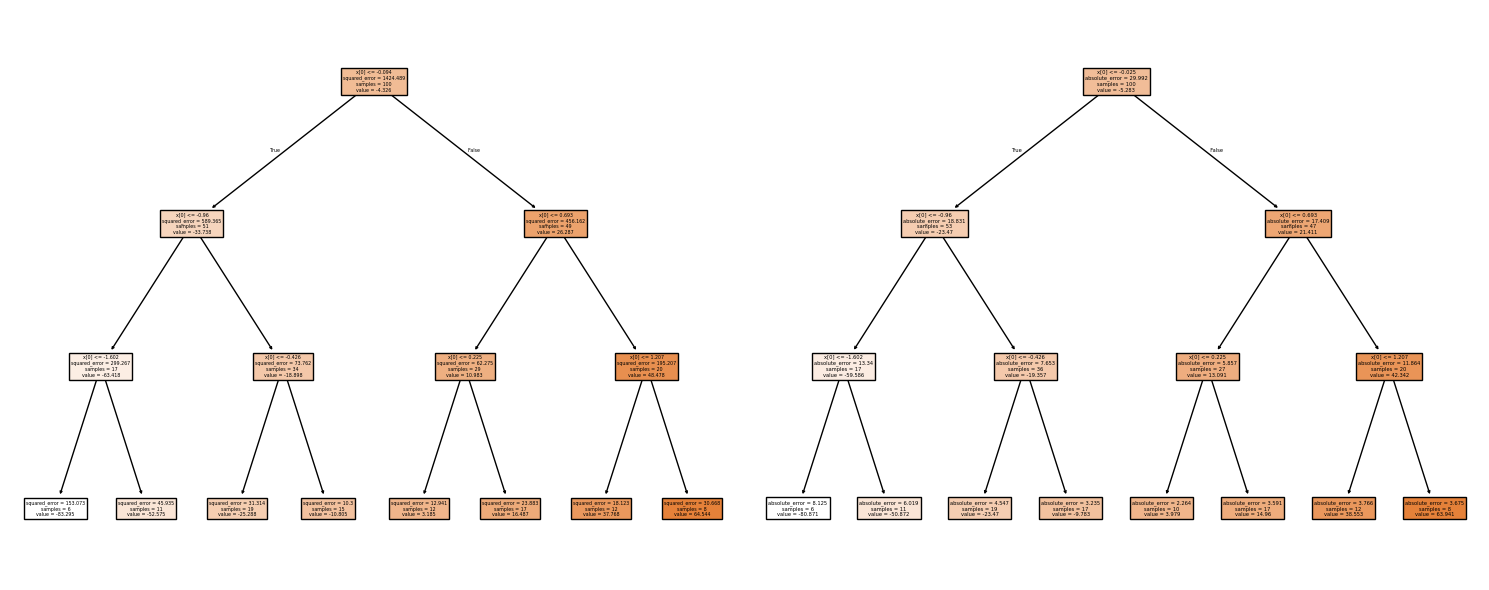

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Create two decision tree regressors (one for MSE, one for MAE)
reg_mse = DecisionTreeRegressor(criterion='squared_error', max_depth=3, random_state=42)
reg_mae = DecisionTreeRegressor(criterion='absolute_error', max_depth=3, random_state=42)

# Fit both regressors to the data
reg_mse.fit(X, y)
reg_mae.fit(X, y)

# Subplot layout for side-by-side visualization
plt.figure(figsize=(15, 6))

# Plot MSE Tree
plt.subplot(1, 2, 1)
plt.title("Regression Tree (MSE - Mean Squared Error)")
plot_tree(reg_mse, filled=True)

# Plot MAE Tree
plt.subplot(1, 2, 2)
plt.title("Regression Tree (MAE - Mean Absolute Error)")
plot_tree(reg_mae, filled=True)

plt.tight_layout()
plt.show()


# Causal Forest:

Causal Forests are the equivalent of random forests, but for the estimation of heterogeneous treatment effects, exactly as for causal trees and regression trees. Exactly as for Causal Trees, we have a fundamental problem: we are interested in predicting an object that we do not observe: the individual treatment effects τᵢ. The solution is to create an auxiliary outcome variable Y* whose expected value for every single observation is exactly the treatment effect.

![image.png](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*DO6eIZVSmwc10I1mZ9KyeQ.png)



In [ ]:
from econml.dml import CausalForestDML

np.random.seed(0)
forest_model = CausalForestDML(max_depth=3)
forest_model = forest_model.fit(Y=df[dgp.Y], X=df[X], T=df[dgp.D])


Differently from Causal Trees, Causal Forests are harder to interpret since we cannot visualize every single tree.

We can use the SingleTreeCateInterpreter function to plot an equivalent representation of the Causal Forest algorithm.

In [ ]:
from econml.cate_interpreter import SingleTreeCateInterpreter

intrp = SingleTreeCateInterpreter(max_depth=2).interpret(forest_model, df[X])
intrp.plot(feature_names=X, fontsize=12)
